# Project 1. Dimension Reduction Using SVD and PCA

### Student ID: 914920690
### Student Name: Truc Le

In [1]:
# All Import Statements Defined Here
# Note: Do not change anything

import numpy as np
from typing import List
import math
import matplotlib.pyplot as plt
from matplotlib.image import imread

from numpy.linalg import svd
from sklearn.decomposition import PCA
import os
from sklearn.datasets import load_digits

%matplotlib inline

## Part 1. SVD Image Compression

### Load Data (do not change the code !) 

In [2]:
## image1 should be data.png, which is contained in the project zip file
## image2 should be your own colored face photo in png format named as photo.png

image1 = imread(os.getcwd()+'/data.png')
image2 =  imread(os.getcwd()+'/photo.png')

image1 = image1[:,:,:3]
image2 = image2[:,:,:3]

## store the images in image_dict with name lake for image1 and name photo for image2

image_dict = {'lake':image1,'photo':image2}

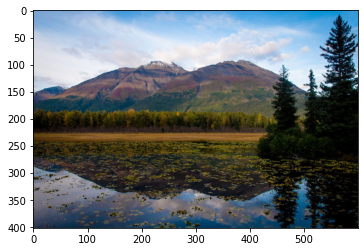

In [3]:
plt.imshow(image_dict['lake'])

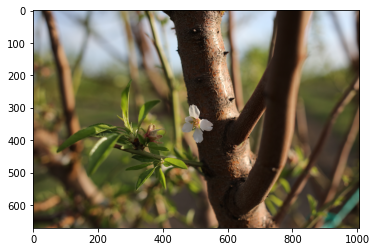

In [4]:
plt.imshow(image_dict['photo'])

In [5]:
image_dict['photo'].shape

## See below for explanation of the dimensions

(671, 1007, 3)

So one can think of a digital image as consisting of three layers (one for red (R), one for green (G), and one for blue (B)), and each layer is a matrix (here of size 671 x 1007). One can also think of a 3-d matrix, where here the size of the third dimension is very small (only three) as compared to the other two sizes (671 and 1000).

<font color='red'>Add a bit of introduction to yourself here, like your name, major, year, background, interests or any fun things you want to talk about.</font>

Hello, my name is Truc (Prefered name: True) Le and I am a senior in the statistics department. I started UC Davis as an NPB (Neurobiology, Physiology and Behavior) major and switched to Statistics: Statistical Data Science major at the beginning of the Covid-19 Pandemic. My current hobby right now is baking bread, I am interested in the mechanisms that allows bread to be simultaneously pores and still maintain its structural integrity. My foreseeable career goal is to apply the concepts I learned in statistics and data science into either the field of biology or healthcare, in particular, medical imaging. 

### Write a function to get the compressed matrix

SVD can be used to find lower rank approximations of matrices by setting certain (small) singular values to be zero. More specifically, if $X = s_1u_1v_1^\top＋\ldots+s_du_dv_d^\top$, then we can use ${\tilde X}_k = s_1u_1v_1^\top＋\ldots+s_ku_kv_k^\top$ where $k<d$ to approximate $X$. Note that ${\tilde X}_k$ (which we use as an approximation) is represented as a sum of $k$ summands, each of which an outer product, i.e. the approximation matrix is a weighted sum of rank one matrices, and thus the rank of this matrix does not exceed $k$ (so it is lower than $d$). This approximation matrix is used as the compressed matrix. This a compressed matrix, because we only need to store the $k$ vectors $u_1,\ldots,u_k$, the $k$ vectors $v_1,\ldots,v_k$ and the first $k$ singular values. Thus, if the matrix $X$ is $n\times m$, then storing the entire matrix $X$ means storing its $n*m$ entries, while storing ${\tilde X}_k,$ we only need to store $k(1+n+m)$ numbers. So if $k$ is relatively small as compared to min$(n,m)$, then it is much cheaper to store ${\tilde X}_k$. Of course, when doing so, we need to make sure that we do not loose too much information (see 'reconstruction error' below). 

Now, write a function to implement this compression of the images.

Recommended functions: svd

In [6]:
## First, write a function to compress a matrix; this will then be used to compress an image

def compress_svd(matrix:List[List[int]], k:int)->List[List[int]]:
    """
    use svd to perform matrix compression
    use the svd function from numpy.linalg to perfrom the svd decomposition
    use the first k singular values to reconstruct the compressed matrix
    """
    
    ## write your code here
    
    # SVD of image matrix
    U, S, VT = np.linalg.svd(matrix,full_matrices=False)
    
    # reconstructing the compressed matrix
    compressed_matrix = np.dot(U[:,:k],np.dot(np.diag(S[:k]),VT[:k,:]))
                   
    ##end of your code
    
    return compressed_matrix

### Write the following functions to compress the images in two different ways

Each image file has three channels "RGB", which corresponds to image[:,:,0], image[:,:,1], and image[:,:,2]. The values in image[i,j,0] corresponds to the intensity of the red channel at location (i,j). Now, you need to write two different functions 
- "compress_show_images_reshape" to perform compression by combining the three channels together to a bigger matrix and then decomposing it to three channels
- "compress_show_images_separate" to perform compressions on three channels separately. 
Reconstruction error is defined as the mean squared error, i.e., the mean (average) of the squared differences between the entries in the original image tensor and the entries in the compressed image tensor. So if your image tensor has shape (I,J,3), then you sum extends over all I * J * 3 squared differences.

Recommended functions: imshow, compress_svd

In [7]:
def compress_show_images_reshape(image_name:str, k:int, show_image=True):
    """
    image_name (string): image name in the image_dict ;
    k (int): number of singular values used for image compression;
    show_image (boolean): whether to plot the compressed images or not;
    
    Concatenate the first three layers of the image tensor into one wide matrix;
    Use compress_svd function to perform svd compression;
    Reshape the wide compressed matrix into an image tensor of three layers;
    If show_image is true, plot the compressed image;
    Put the number of singular values and reconstruction error in the title;
    
    return reconst_error (float), which is the mean squared error of the compressed image
    """

    ## your code starts here
    # get info about the image
    image_OG = image_dict[image_name]
    image_shape = image_OG.shape
    
    # reshape the array from 3d to 2d, expand the columns size by three
    image_reshape = np.reshape(image_OG,[image_shape[0], image_shape[1]*3])
    
    # perform SVD on the reshape array
    image_comp = compress_svd(image_reshape,k)
    
    # reshape the compressed array from 2d back to 3d
    image_reconst = np.reshape(image_comp, image_shape)
    
    # reconstruction error using Frobenius norm
    reconst_error = np.square(np.subtract(image_OG, image_reconst)).mean()

    # output the compressed image along with the singular value and MSE
    if show_image:
        f, ax1 = plt.subplots(1,1, figsize=(20,10))
        f.suptitle("Singular value: {} and reconstruction error: {}".format(k, reconst_error), fontsize=20)
        ax1.imshow(image_reconst)
        
                        
    
    ## end of your code
    
    return reconst_error

In [8]:
def compress_show_images_separate(image_name:str, k:int, show_image=True):
    """
    image_name (string): image name in the image_dict;
    k (int): number of singular values used for image compression;
    Show_image (boolean): whether to plot the compressed images or not;
    
    Use compress_svd function to perform svd compression for each of the three layers of the image tensor separately;
    If show_image is true, plot the compressed image;
    Put the number of singular values and reconstruction error in the title;

    return reconst_error (float), which is the mean squared error of the compressed image
    """

    ## your code starts here
    image_OG = image_dict[image_name]
    image_shape = image_OG.shape
    
    #separating each layer and reshaping the layer into 2d array                   
    R,B,G = np.dsplit(image_OG,image_OG.shape[-1])
    r = np.reshape(R,[R.shape[0], R.shape[1]])
    b = np.reshape(B,[B.shape[0], B.shape[1]])
    g = np.reshape(G,[G.shape[0], G.shape[1]])
    
    # performing svd on individual layer
    r_comp = compress_svd(r, k)
    b_comp = compress_svd(b, k)
    g_comp = compress_svd(g, k)

    # reshaping each layer from 2d back into 3d array
    r_reconst = np.reshape(r_comp, R.shape)
    b_reconst = np.reshape(b_comp, B.shape)
    g_reconst = np.reshape(g_comp, G.shape)
    
    # concating the first three layers back into a 3d array          
    image_reconst = np.dstack([r_comp,b_comp,g_comp])

    # reconstruction error using Frobenius norm
    reconst_error = np.square(np.subtract(image_OG, image_reconst)).mean()

    # output the compressed image along with the singular value and MSE
    if show_image:
        f, ax1 = plt.subplots(1,1, figsize=(20,10))
        f.suptitle("Singilar value: {} and reconstruction error: {}".format(k, reconst_error), fontsize=20)
        ax1.imshow(image_reconst)
    else:
        pass
    
    
    
    ## end of your code
    
    return reconst_error



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


0.0021811177

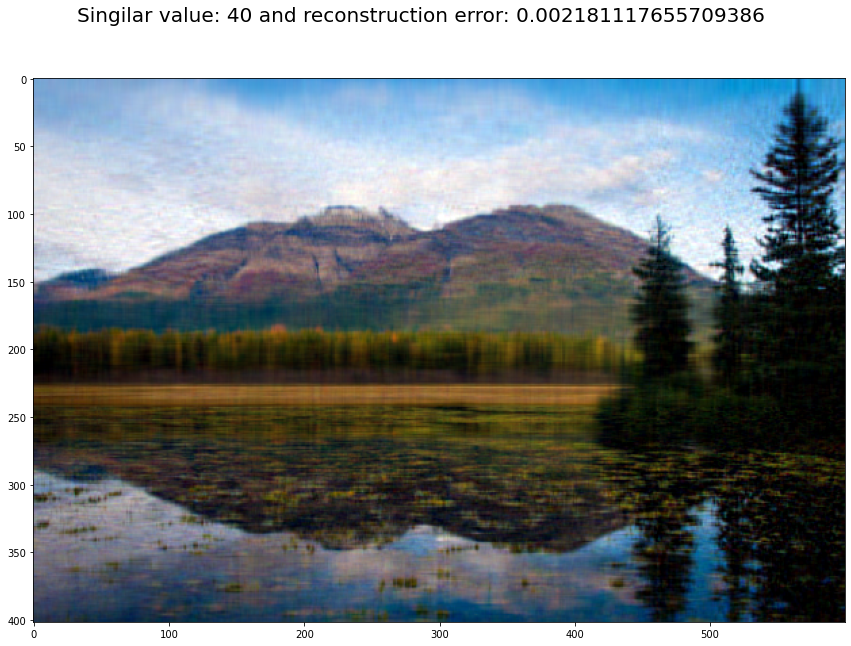

In [9]:
compress_show_images_separate('lake',40)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


0.002594962

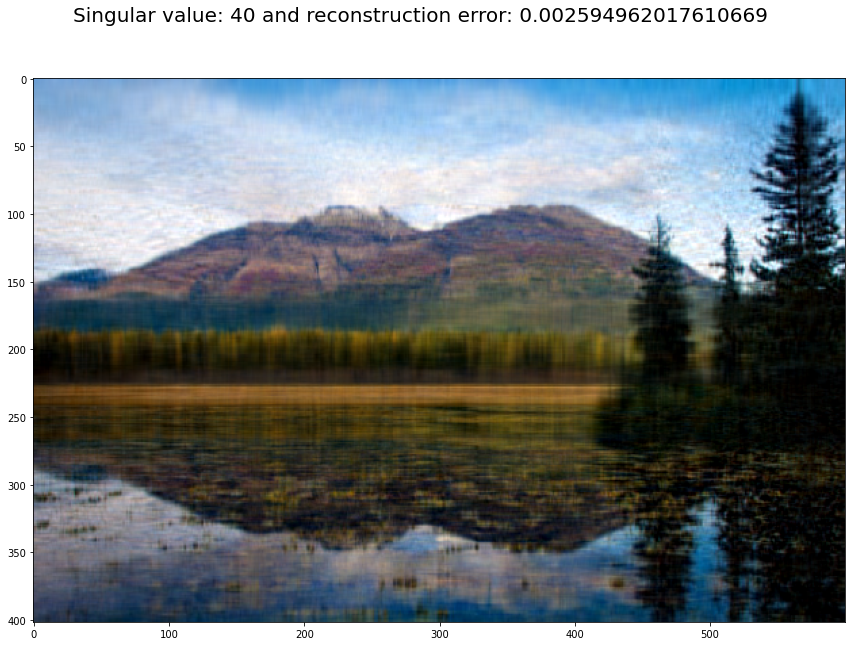

In [10]:
compress_show_images_reshape('lake',40)

### Write a function to plot the reconstruction errors and their differences 

Compare and visualize the reconstruction errors (see above). Recommended functions to use: matplotlib.pyplot, subplot.

In [11]:
def plot_error(image_name:str, k_min:int, k_max:int):
    """
    image_name (string): image name in the image_dict ;
    k_min (int): minimum number of singular values used for image compression;
    k_max (int): maximum number of singular values used for image compression;

    Plot the reconstruction errors using k ranging from k_min to k_max;
    Use a blue line to indicate the reconstruction error using compress_show_images_reshape function;
    Use a orange line to indicate the reconstruction error using compress_show_images_separate function;
    In a separate subfigure, plot the difference of the reconstruction errors for each k between k_min and k_max
    
    """ 
    
    ## your code starts here

    # initiating a list of K values using the min and max K values 
    k_range = list(range(k_min, k_max))
    
    reshape_error = []
    separate_error = []
    diff_error = []
    
    # calculating the reconstruction errors for each k for both the reshaping and separation svd methods
    for i in k_range:
        reshape_error.append(compress_show_images_reshape(image_name, i,show_image=False))
        separate_error.append(compress_show_images_separate(image_name, i,show_image=False))
        diff_error.append(compress_show_images_reshape(image_name, i,show_image=False) - compress_show_images_separate(image_name, i,show_image=False))
    
    # plotting the subplots for the reconstruction errors for each k value
    plt.plot(k_range, reshape_error, label = "reshape_error", color='blue')
    plt.plot(k_range, separate_error, label = "separate_error", color='orange')
    plt.xlabel('K: Singular Values')
    plt.ylabel('Reconstruction error')
    plt.title('Reconstruction Error of different K values')
    plt.legend()
    plt.show()
    
    # plotting the difference of the reconstruction errors for each K
    plt.plot(k_range, diff_error)
    plt.xlabel('K: Singular Values')
    plt.ylabel('The Difference of Reconstruction errors')
    plt.title('The Difference of the Reconstruction Errors for each K')
    plt.show()
    ## end of your code
    
    


In [12]:
def EDA(image_name:str, k_min:int, k_max:int):
    """
    image_name (string): image name in the image_dict ;
    k_min (int): minimum number of singular values used for image compression;
    k_max (int): maximum number of singular values used for image compression;

    Plot the reconstruction errors using k ranging from k_min to k_max;
    Use a blue line to indicate the reconstruction error using compress_show_images_reshape function;
    Use a orange line to indicate the reconstruction error using compress_show_images_separate function;
    In a separate subfigure, plot the difference of the reconstruction errors for each k between k_min and k_max
    
    """ 
    
    ## your code starts here

    # initiating a list of K values using the min and max K values 
    k_range = list(range(k_min, k_max))
    
    reshape_error = []
    separate_error = []
    diff_error = []
    
    # calculating the reconstruction errors for each k for both the reshaping and separation svd methods
    for i in k_range:
        reshape_error.append(compress_show_images_reshape(image_name, i,show_image=False))
        separate_error.append(compress_show_images_separate(image_name, i,show_image=False))
        diff_error.append(compress_show_images_reshape(image_name, i,show_image=False) - compress_show_images_separate(image_name, i,show_image=False))
        
    plt.plot(k_range, reshape_error, label = "reshape_error", color='blue')
    plt.plot(k_range, separate_error, label = "separate_error", color='orange')
    plt.xlabel('K: Singular Values')
    plt.ylabel('Reconstruction error')
    plt.title('Reconstruction Error of different K values')
    plt.legend()
    plt.show()
    
    # plotting the difference of the reconstruction errors for each K
    plt.plot(k_range, diff_error)
    plt.xlabel('K: Singular Values')
    plt.ylabel('The Difference of Reconstruction errors')
    plt.title('The Difference of the Reconstruction Errors for each K')
    plt.show()
    ## end of your code
    
    plt.bar(k_range , diff_error, color = 'r', edgecolor = 'red',
        label='diff_error')
  

In [13]:
#EDA('lake',1,150)

Make some exploratory plots (do not include it in your final submission). Describe briefly what you find (is one error always smaller than the other? is the difference monotonic?)

There are times when the reconstruction errors for the SVD reshape method is smaller than the reconstruction errors for the SVD separate method for small singular values, however, for the majority of the time the SVD separate method has reconstruction errors. The difference between the reconstruction errors is not monotonic, since there a time where the values of the difference increases then decrease.

## <font color="Red"> Run the following code.</font> (do not change the code!)

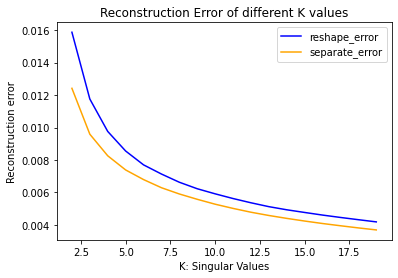

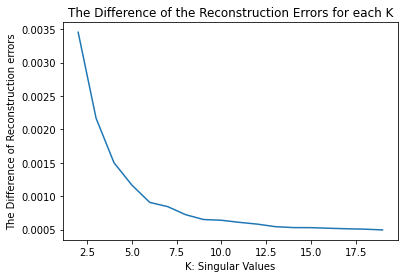

In [14]:
plot_error('lake',2,20)

In [15]:
[compress_show_images_separate('lake',k,False) for k in [1,5,10,20,30,40,20000]]

[0.018221032,
 0.0073899403,
 0.005279084,
 0.0035794622,
 0.0027349214,
 0.0021811177,
 2.3153242e-14]

In [16]:
[compress_show_images_reshape('lake',k,False) for k in [1,5,10,20,30,40,20000]]

[0.021424817,
 0.0085557,
 0.005917929,
 0.004069459,
 0.003191525,
 0.002594962,
 2.3300111e-14]

In [17]:
from ipywidgets import interact

In [18]:
interact(compress_show_images_reshape,image_name=['lake','photo'], k=(10,70))

interactive(children=(Dropdown(description='image_name', options=('lake', 'photo'), value='lake'), IntSlider(v…

<function __main__.compress_show_images_reshape(image_name: str, k: int, show_image=True)>

## Part 2. PCA of hand-written digits

### Load data

The data we are going to work with are hand-writted digits data. The digits data available in sklearn consists of 1797 images of handwritten digits, each image consisting of  8×8=64  pixels. We can think of the digits to consist of 10 classes (one class for each of the digits 0 - 9). Indeed, the data set comes with labels 0-9, indicating the figure it represents ("digits.target" gives you these labels as an array).  Change the value of the index to plot different images.

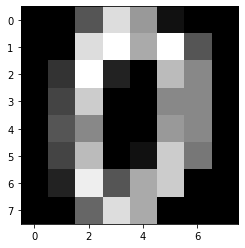

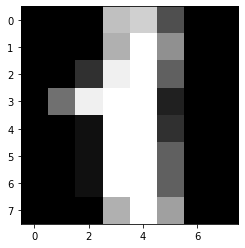

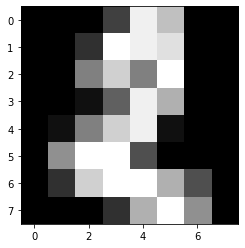

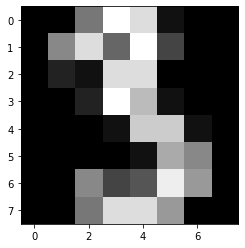

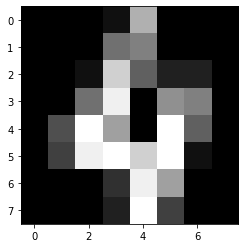

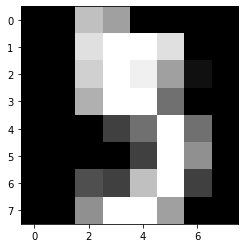

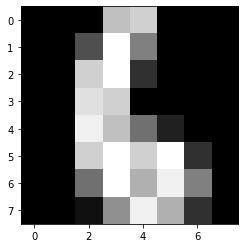

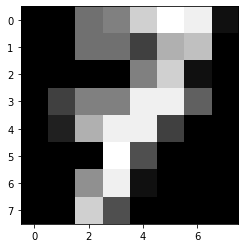

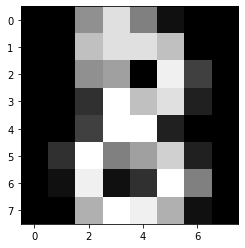

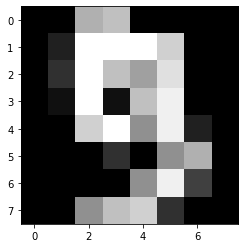

In [19]:
index = 10
digits = load_digits()
for i in range(10):
    plt.imshow(digits.images[i],cmap='gray') 
    plt.show()
target = digits.target

In [20]:
# To see the size of the data set
digits.data.shape

(1797, 64)

### Check the covariance matrix

Notice that in contrast to the first part of this project, we here have many images, and we consider each image as a data point. To this end we consider each image, i.e. each $(8 \times 8)$-matrix representing the image, as a vector (a 'stringed' matrix) of length $8 \times 8 = 64$. So our data are now 64-dimensional vectors, and we have 1797 such data points. 

The following code computes the covariance matrix of these data vectors and gets its rank. 

In [21]:
mu=digits.data.mean(axis=0)
X=digits.data
X_bar=np.repeat(mu,X.shape[0]).reshape(len(mu),-1).T
cov=np.dot( (X-X_bar).T, X-X_bar )

np.linalg.matrix_rank(cov)

61

So, in the above code, X is our $(1797 \times 64)$ data matrix, where each row is one of the images considered as a $64$-dimensional vector. X_bar is the 64-dimensional vector of averages (taken over the 1797 vectors) of each of the components of the vector, so that np.cdot(X-X_bar.T X-X_bar) is the covariance matrix of our 64-dimensional data cloud. Interpret what you have found above.

The rank of the covariance matrix is 61, meaning that there are 61 linearly independent factors within the the matrix X.  

### Now use PCA to find a 2-dim subspace to reconstruct the digits 

Here we first perform dimension reduction of our 64-dimensional data. The goal is to reduce the dimension to 2, and we want to use PCA for that. Then we 'reconstruct' the data by finding the approximation to the original image (or vector in 64-dimensional space).  To this end, we find the first two principal components (i.e. the first two principal component loading vectors) and use them together with the correponding principal component scores to reconstruct the digits image. Formally, if $w_1,\ldots,w_p$ denote the principal component loading vectors, or the principal axis (recall that the form a basis of unit eigenvectors of the covariance matrix), then each $p$-dimensional data vector $X$ can be written as

$$X = \sum_{j=1}^p w_j Z_{j}$$

where $Z_{j} = \langle w_j,X \rangle$ is the projection score of $X$ when projected on $w_j$. The 'reconstruction' $X^{(k)}_{\rm inv}$ of $X$ based on $k \le p$ principal component axis is

$$X^{(k)}_{\rm inv} = \sum_{j=1}^k w_j Z_{j}.$$

The index 'inv' stands for *inverse* (so we try to approximate the inverse map: from the principal axes (loadings) and principal component scores (or projection scores) back to the data). You don't have to implement the reconstruction yourself. Just use corresponding recommended function that comes with the PCA function from scikit-learn (sklearn).

Recommend functions: PCA, transform, inverse_transform

In [22]:
## X_new is a list of lists which contains the first two PC for each digit image
## X_inv is the reconstructed digit image with the same shape as X
## set the random_state = 12 for the PCA function(!) this is important for your grade.

## your code starts here
# PCA with 2 components and random state is 12
pca = PCA(n_components=2,  random_state=12)

# performing PCA on the each of the digit image 
X_new = pca.fit_transform(X)

# reconstructing the transformed image 
X_inv = pca.inverse_transform(X_new)

### Plot each digit (elements in X_new) with different color labels

Make a scatter plot of the first two pc scores and mark each point with different color that corresponds to its label, 0~9.

Recommended functions: plt.scatter

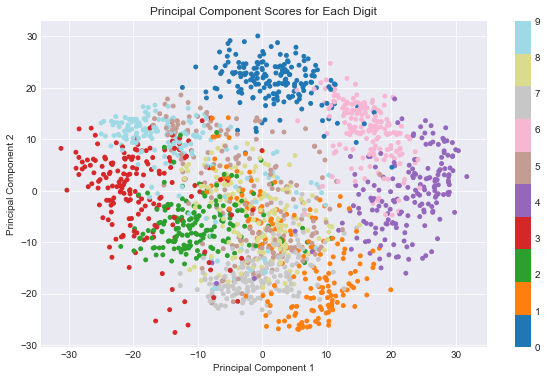

In [23]:
## your code starts here
plt.style.use('seaborn-darkgrid')
plt.figure(figsize = (10,6))
c_map = plt.cm.get_cmap('tab20', 10)
plt.scatter(X_new[:, 0], X_new[:, 1], s = 15,
            cmap = c_map , c = target)
plt.colorbar()
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Principal Component Scores for Each Digit')
plt.show()

## end here

### Write a function to do a side-by-side plot of the original digit and the reconstructed digit

The left subplot is the original digit, the right subplot is the reconstructed digit. 'index' is the index of the image we want to reconstruct and plot.

In [24]:
def plot_digits(index:int):
    """
    the left part is the compressed digit, the right part is the original digit
    """
    ## your code starts here
    image_og = digits.images[index]
    image_pca = np.reshape(X_inv[index], image_og.shape)
    
    fig, (ax1, ax2) = plt.subplots(1, 2)
    ax1.imshow(image_pca,cmap='gray')
    ax1.set_title('Compressed Digit Image')
    ax2.imshow(image_og,cmap='gray')
    ax2.set_title('Original Digit Image')
    
    
    ## end here

## <font color="Red"> Run the following code.</font> (do not change the code!)

In [25]:
X_inv[0]

array([-5.64936340e-16,  1.10626914e-01,  4.44191193e+00,  1.18063215e+01,
        1.07493158e+01,  3.39833625e+00,  5.09920504e-02, -4.20291639e-02,
        2.49610241e-03,  1.69701669e+00,  1.19740914e+01,  1.16788043e+01,
        8.38141400e+00,  7.34547162e+00,  6.11223386e-01,  3.14124548e-02,
        1.94499279e-03,  3.47286485e+00,  1.40160400e+01,  5.68604617e+00,
        2.51564997e+00,  7.91668154e+00,  2.32198152e+00,  4.03119253e-02,
       -2.15810066e-04,  4.02956705e+00,  1.27804312e+01,  5.93137976e+00,
        4.63725756e+00,  8.66603267e+00,  3.63836316e+00,  2.81493730e-03,
        0.00000000e+00,  4.01350990e+00,  9.05748081e+00,  3.10220333e+00,
        4.12475708e+00,  1.22384928e+01,  5.60232331e+00,  0.00000000e+00,
        1.34385175e-02,  2.53046924e+00,  9.27133942e+00,  1.19509350e+00,
        9.92216788e-01,  1.33325823e+01,  8.13131651e+00,  5.34711306e-02,
        1.24618644e-02,  9.39578740e-01,  1.08402535e+01,  6.87893829e+00,
        7.21199881e+00,  

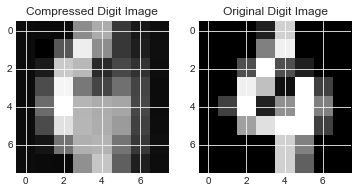

In [26]:
plot_digits(100)

# <font color="blue"> Submission Instructions</font>

1. Click the Save button at the top of the Jupyter Notebook.
2. Select Cell -> All Output -> Clear. This will clear all the outputs from all cells (but will keep the content of the cells). 
3. Select Cell -> Run All. This will run all the cells in order, and will take several minutes. <font color='red'>You will not get any grade if you don't follow this step strictly.</font>
4. Once you've rerun everything, select File -> Download as -> HTML
5. Look at the html file and make sure all your solutions are there, displayed correctly. The HTML file is the only thing your graders will see!
6. Submit your HTML file on Gradescope.
7. Pack all the relevant files (Project_1.ipynb, data.png, photo.png) into a zipfile yourfirstname_yourlastname.zip and upload it to Canvas.